In [1]:
cd("..") # set correct working directory 
cd("..") 
pwd() # the path should go to the folder with the .git file 

"/home/samuel/Documents/projects/cpmmh for sdemems/code"

In [2]:
using Pkg
using Pkg
using PyCall 
PyDict(pyimport("matplotlib")["rcParams"])["ps.useafm"] = [true]
PyDict(pyimport("matplotlib")["rcParams"])["pdf.use14corefonts"] = [true]
PyDict(pyimport("matplotlib")["rcParams"])["text.usetex"] = [true]
using PyPlot 
using LinearAlgebra
using DataFrames
using KernelDensity  
using LaTeXStrings
using Distributions
using CSV

import Statistics.mean
import Statistics.std



┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = top-level scope at In[2]:4
└ @ Core In[2]:4
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = top-level scope at In[2]:5
└ @ Core In[2]:5
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = top-level scope at In[2]:6
└ @ Core In[2]:6


# Bootstrap filter

In [5]:
nbr_particles_pf = [20, 50, 100, 200, 250, 500, 1000, 2000, 3000, 4000]

10-element Array{Int64,1}:
   20
   50
  100
  200
  250
  500
 1000
 2000
 3000
 4000

In [8]:
data = Matrix(CSV.read("data/SDEMEM OU neuron data/tune_nbr_particles_bootstrap_pf.csv"))

50×11 Array{Float64,2}:
  18.8192  -1.40503e8  -4.06963e7  …       -2.70075e5       -1.58448e5
  39.6519  -1.38567e8  -4.15197e7          -2.81795e5       -2.00777e5
  58.2144  -1.38852e8  -4.17568e7          -3.10997e5       -1.40737e5
 118.019   -1.46077e8  -4.19576e7          -2.33242e5       -1.76727e5
  73.6987  -1.41399e8  -4.16937e7          -2.71774e5       -1.63131e5
 106.046   -1.43134e8  -4.14168e7  …       -2.64872e5       -1.38687e5
 179.35    -1.37722e8  -4.19526e7          -2.52426e5       -1.76663e5
 359.034   -1.37755e8  -4.05532e7          -2.67226e5       -2.18877e5
 563.744   -1.40124e8  -4.15639e7          -2.84126e5  -153248.0      
 793.847   -1.38718e8  -4.09229e7          -2.80835e5       -1.77268e5
   0.0     -1.38747e8  -4.05822e7  …       -2.6049e5        -1.63532e5
   0.0     -1.40717e8  -4.09679e7          -2.46825e5       -1.6144e5 
   0.0     -1.39249e8  -4.06577e7          -2.10251e5       -1.48818e5
   ⋮                               ⋱                 

In [9]:
runtimes = data[1:size(data,2)-1,1]
pf_vals = data[:,2:end]

50×10 Array{Float64,2}:
 -1.40503e8  -4.06963e7  -1.72984e7  …       -2.70075e5       -1.58448e5
 -1.38567e8  -4.15197e7  -1.68966e7          -2.81795e5       -2.00777e5
 -1.38852e8  -4.17568e7  -1.7433e7           -3.10997e5       -1.40737e5
 -1.46077e8  -4.19576e7  -1.73948e7          -2.33242e5       -1.76727e5
 -1.41399e8  -4.16937e7  -1.86464e7          -2.71774e5       -1.63131e5
 -1.43134e8  -4.14168e7  -1.69308e7  …       -2.64872e5       -1.38687e5
 -1.37722e8  -4.19526e7  -1.75313e7          -2.52426e5       -1.76663e5
 -1.37755e8  -4.05532e7  -1.73206e7          -2.67226e5       -2.18877e5
 -1.40124e8  -4.15639e7  -1.74789e7          -2.84126e5  -153248.0      
 -1.38718e8  -4.09229e7  -1.68423e7          -2.80835e5       -1.77268e5
 -1.38747e8  -4.05822e7  -1.74598e7  …       -2.6049e5        -1.63532e5
 -1.40717e8  -4.09679e7  -1.69466e7          -2.46825e5       -1.6144e5 
 -1.39249e8  -4.06577e7  -1.70885e7          -2.10251e5       -1.48818e5
  ⋮                        

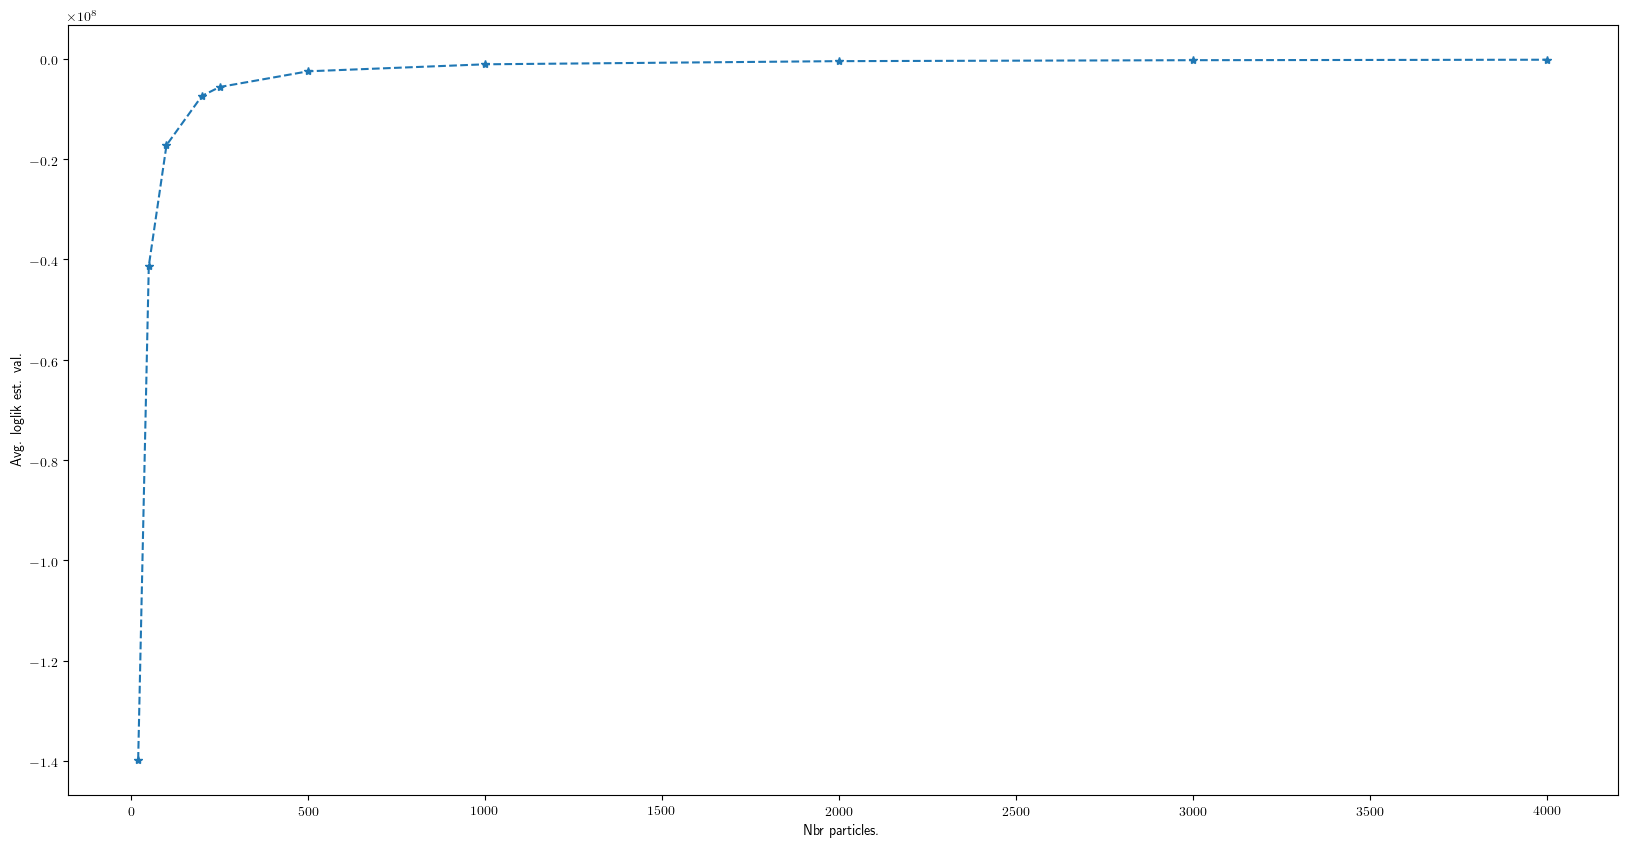

PyObject Text(24,0.5,'Avg. loglik est. val.')

In [10]:
PyPlot.figure(figsize=(20,10))
PyPlot.plot(nbr_particles_pf, mean(pf_vals, dims = 1)[:], "--*")
PyPlot.xlabel("Nbr particles.")
PyPlot.ylabel("Avg. loglik est. val.")

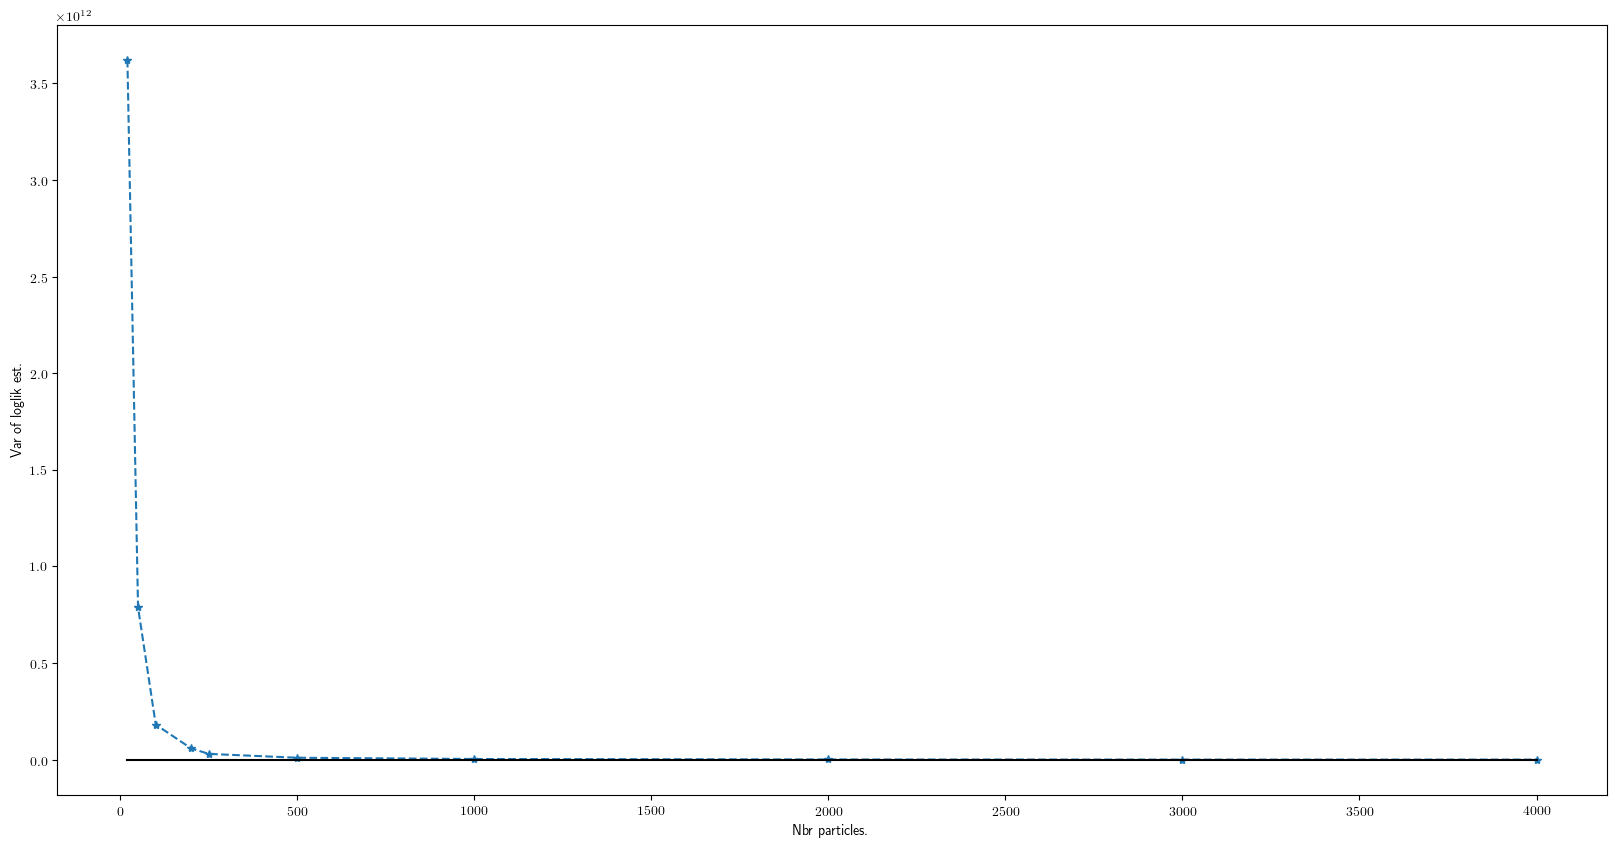

PyObject Text(24,0.5,'Var of loglik est.')

In [11]:
PyPlot.figure(figsize=(20,10))
PyPlot.plot(nbr_particles_pf, var(pf_vals, dims = 1)[:], "--*")
PyPlot.plot(nbr_particles_pf, 2*ones(length(nbr_particles_pf),1), "k")
PyPlot.xlabel("Nbr particles.")
PyPlot.ylabel("Var of loglik est.")

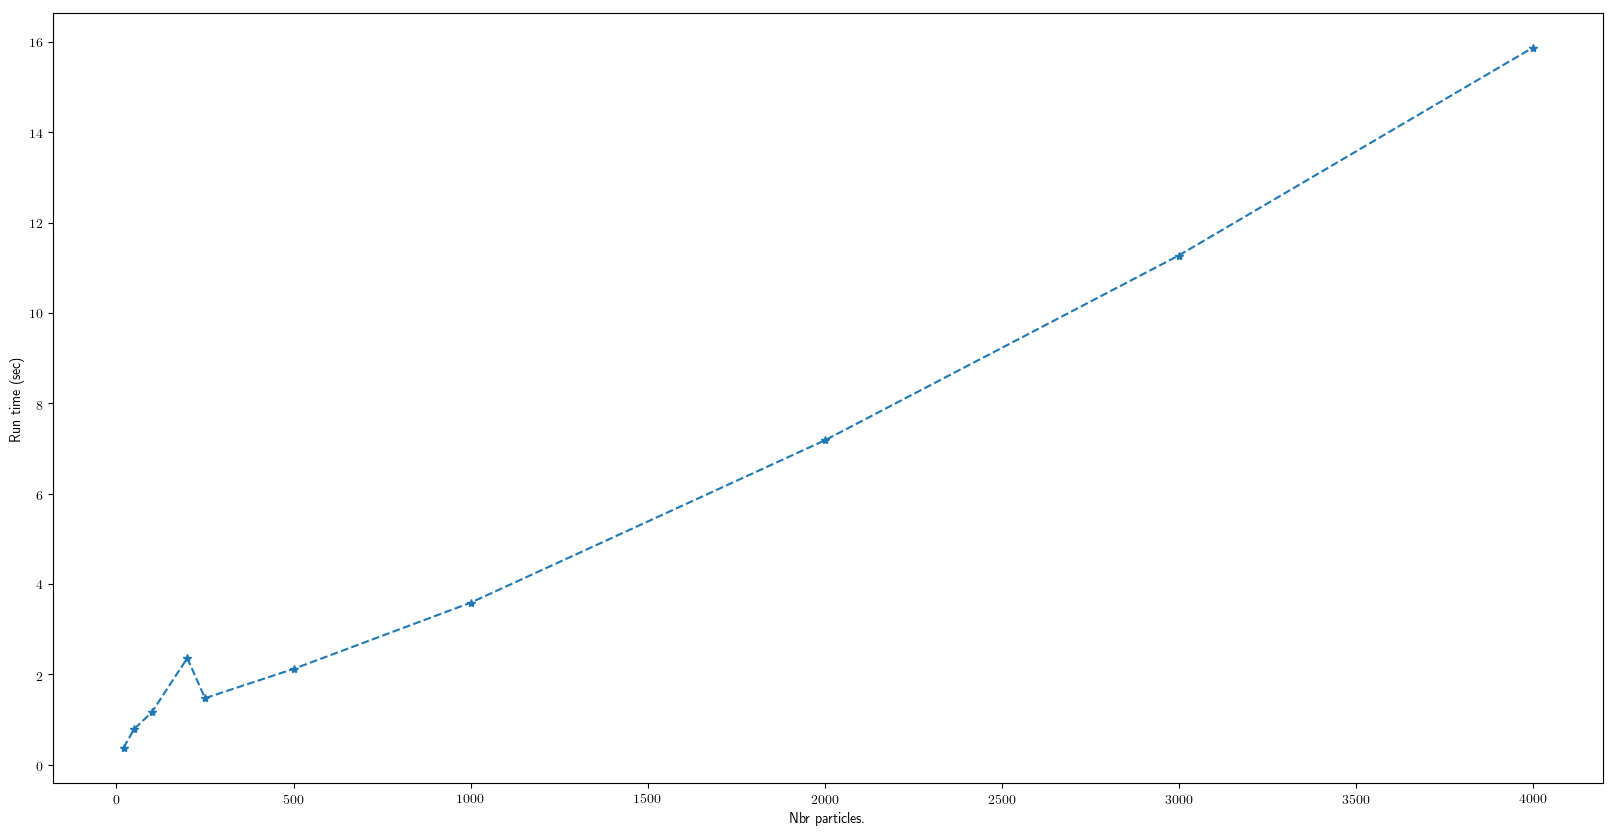

PyObject Text(24,0.5,'Run time (sec)')

In [12]:
PyPlot.figure(figsize=(20,10))
PyPlot.plot(nbr_particles_pf, runtimes/size(data,1), "--*")
PyPlot.xlabel("Nbr particles.")
PyPlot.ylabel("Run time (sec)")


# Bridge filter (pf, no sorting)

In [13]:
nbr_particles_pf = [20, 50, 100, 200, 250, 500, 1000, 2000, 3000, 4000]

10-element Array{Int64,1}:
   20
   50
  100
  200
  250
  500
 1000
 2000
 3000
 4000

In [14]:
data = Matrix(CSV.read("data/SDEMEM OU neuron data/tune_nbr_particles_bridge_pf.csv"))

50×11 Array{Float64,2}:
  24.6967  62286.3  62290.4  62290.4  …  62290.9  62290.1  62290.3  62290.6
  45.4255  62288.7  62290.3  62289.4     62289.9  62290.3  62290.1  62290.5
  70.5079  62284.9  62286.2  62289.3     62290.4  62290.5  62290.4  62290.4
 137.595   62286.2  62291.9  62291.5     62290.6  62290.6  62290.3  62290.3
  94.4445  62292.3  62291.3  62290.4     62290.0  62290.2  62290.1  62290.4
 139.901   62288.3  62288.7  62288.2  …  62290.6  62290.6  62290.4  62290.5
 251.436   62289.1  62288.9  62290.3     62289.8  62290.6  62290.6  62290.3
 475.953   62287.6  62290.1  62289.8     62290.0  62290.2  62290.3  62290.6
 731.452   62288.1  62289.3  62289.4     62290.2  62290.4  62290.1  62290.3
 952.625   62288.5  62287.5  62289.4     62290.9  62290.6  62290.5  62290.4
   0.0     62288.3  62291.0  62289.6  …  62289.9  62290.7  62290.3  62290.5
   0.0     62290.4  62290.3  62290.7     62290.4  62290.3  62290.6  62290.7
   0.0     62287.6  62289.8  62291.5     62289.9  62290.5  62290

In [15]:
runtimes = data[1:size(data,2)-1,1]
pf_vals = data[:,2:end]

50×10 Array{Float64,2}:
 62286.3  62290.4  62290.4  62290.3  …  62290.9  62290.1  62290.3  62290.6
 62288.7  62290.3  62289.4  62290.3     62289.9  62290.3  62290.1  62290.5
 62284.9  62286.2  62289.3  62289.7     62290.4  62290.5  62290.4  62290.4
 62286.2  62291.9  62291.5  62289.4     62290.6  62290.6  62290.3  62290.3
 62292.3  62291.3  62290.4  62290.4     62290.0  62290.2  62290.1  62290.4
 62288.3  62288.7  62288.2  62290.8  …  62290.6  62290.6  62290.4  62290.5
 62289.1  62288.9  62290.3  62290.3     62289.8  62290.6  62290.6  62290.3
 62287.6  62290.1  62289.8  62289.9     62290.0  62290.2  62290.3  62290.6
 62288.1  62289.3  62289.4  62290.9     62290.2  62290.4  62290.1  62290.3
 62288.5  62287.5  62289.4  62289.5     62290.9  62290.6  62290.5  62290.4
 62288.3  62291.0  62289.6  62290.5  …  62289.9  62290.7  62290.3  62290.5
 62290.4  62290.3  62290.7  62290.2     62290.4  62290.3  62290.6  62290.7
 62287.6  62289.8  62291.5  62288.5     62289.9  62290.5  62290.3  62290.5
 

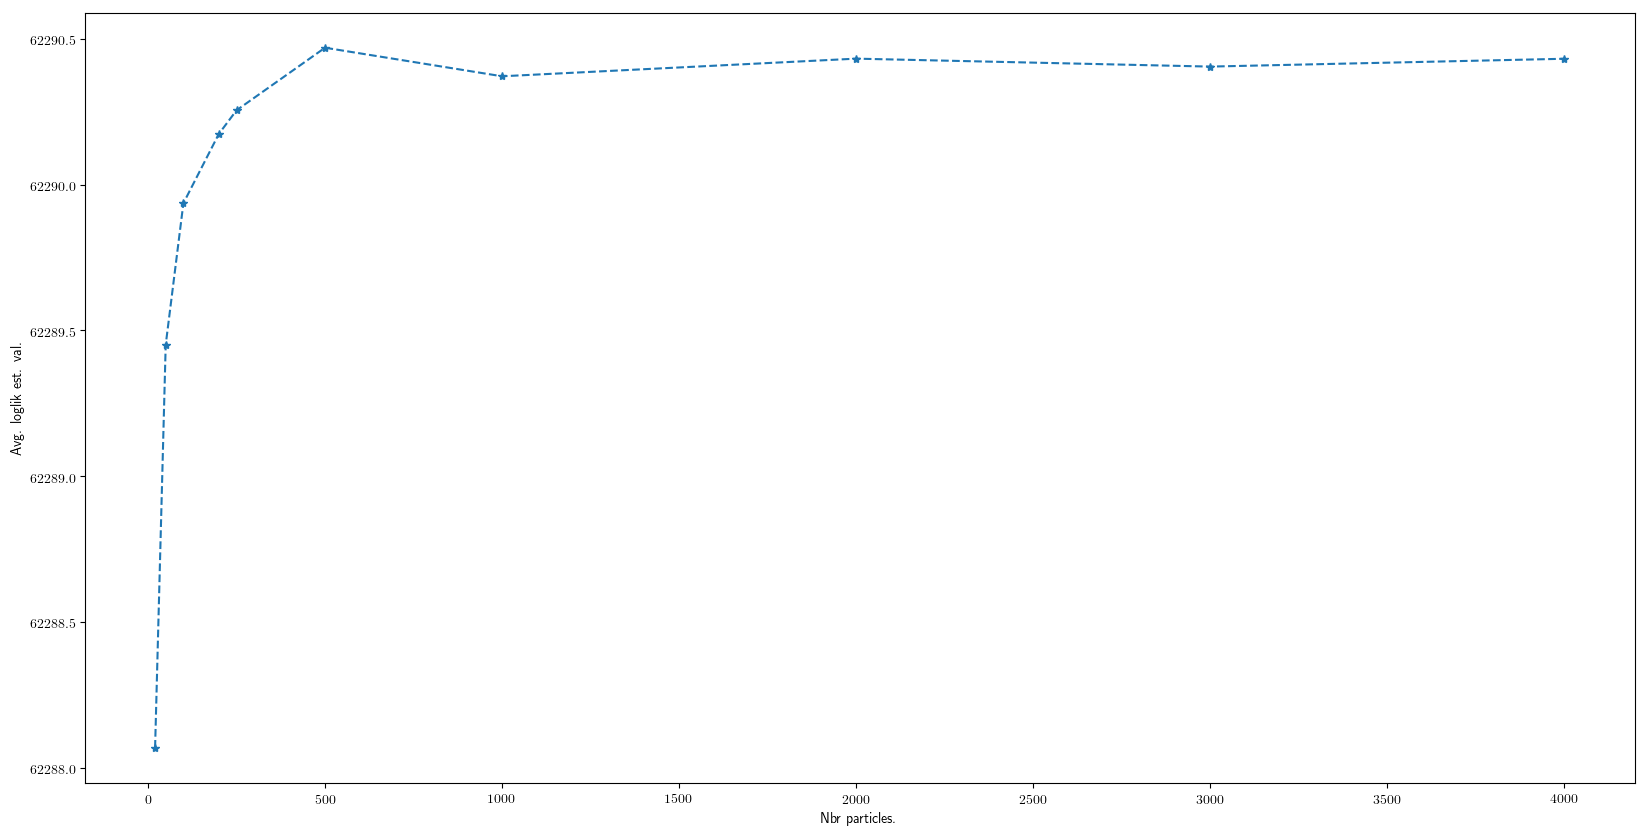

PyObject Text(24,0.5,'Avg. loglik est. val.')

In [16]:
PyPlot.figure(figsize=(20,10))
PyPlot.plot(nbr_particles_pf, mean(pf_vals, dims = 1)[:], "--*")
PyPlot.xlabel("Nbr particles.")
PyPlot.ylabel("Avg. loglik est. val.")

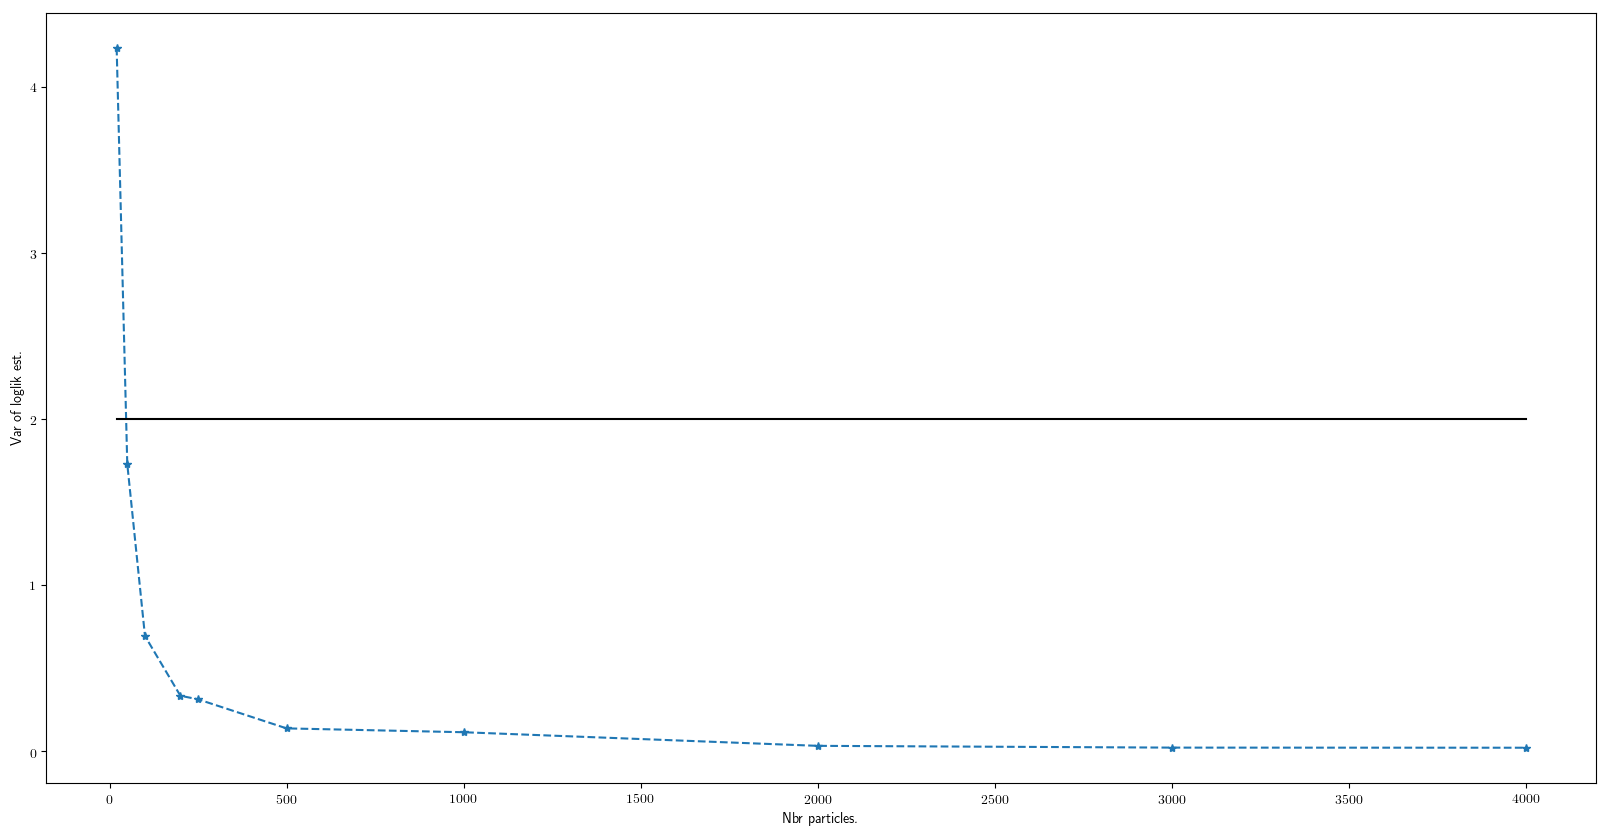

10-element Array{Float64,1}:
 4.2334085158452694  
 1.7287399576882037  
 0.6934984491527029  
 0.3340345191775534  
 0.31252149083213054 
 0.13767038687356536 
 0.11453164365912263 
 0.032620832978434336
 0.021943001887267614
 0.02130587072192962 

In [17]:
PyPlot.figure(figsize=(20,10))
PyPlot.plot(nbr_particles_pf, var(pf_vals, dims = 1)[:], "--*")
PyPlot.plot(nbr_particles_pf, 2*ones(length(nbr_particles_pf),1), "k")
PyPlot.xlabel("Nbr particles.")
PyPlot.ylabel("Var of loglik est.")
var_no_sort = var(pf_vals, dims = 1)[:]

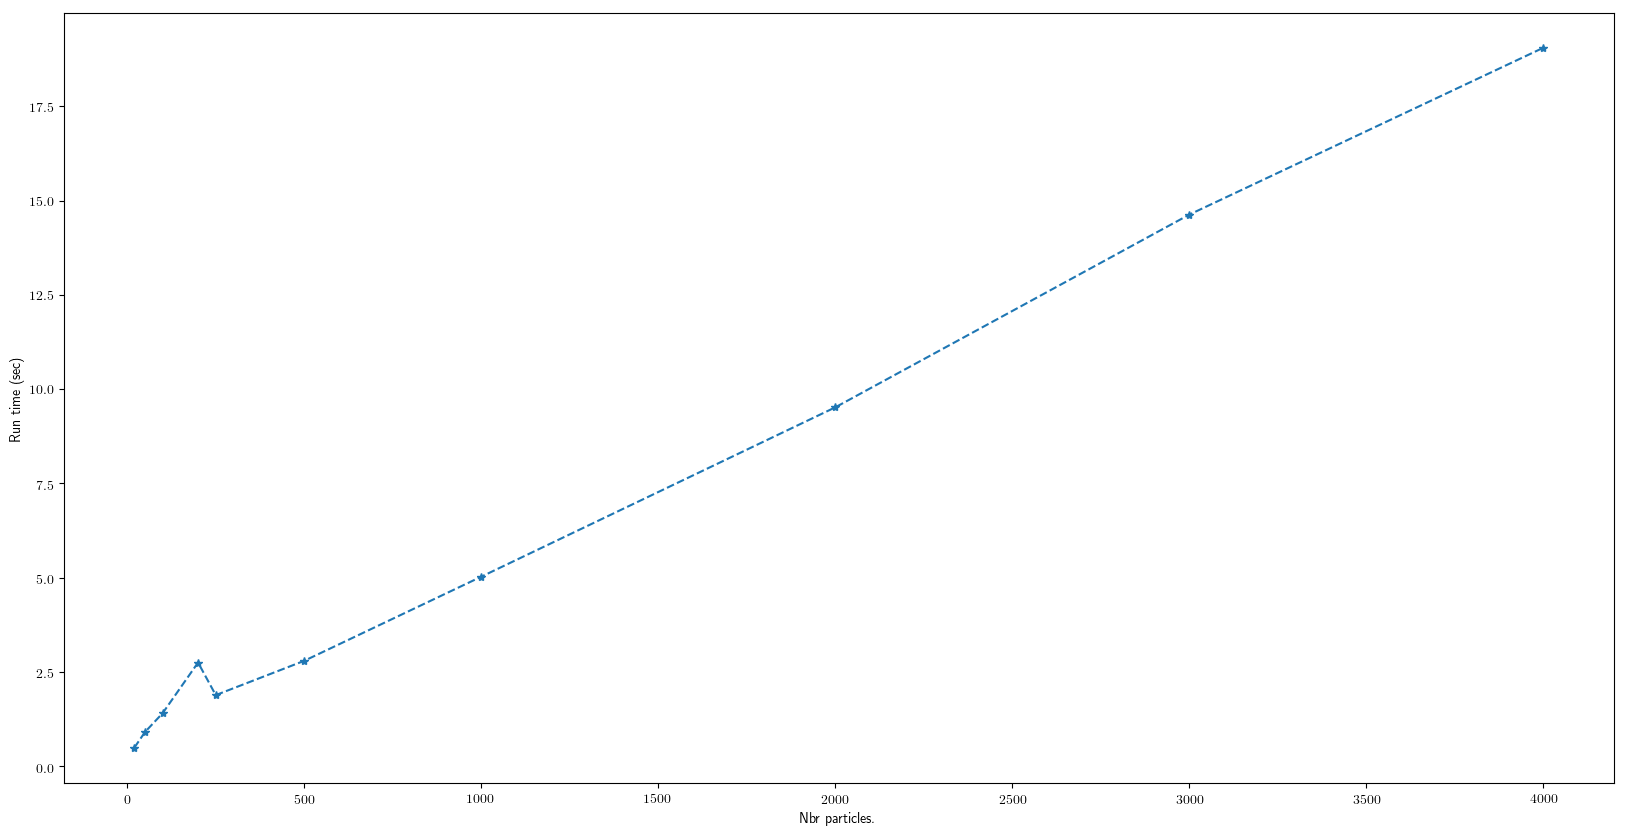

10-element Array{Float64,1}:
  0.49393380022     
  0.9085091015000001
  1.4101582672200002
  2.75190011438     
  1.88888977326     
  2.79801266552     
  5.02872104504     
  9.51906064722     
 14.629036112020001 
 19.052498926680002 

In [18]:
PyPlot.figure(figsize=(20,10))
PyPlot.plot(nbr_particles_pf, runtimes/size(data,1), "--*")
PyPlot.xlabel("Nbr particles.")
PyPlot.ylabel("Run time (sec)")
runtimes_no_sort = runtimes/size(data,1)

# Bridge filter (cpf, sorting)

In [46]:
nbr_particles_cpf = [1, 2, 5, 10, 20, 50, 100, 200, 250, 500, 1000]

11-element Array{Int64,1}:
    1
    2
    5
   10
   20
   50
  100
  200
  250
  500
 1000

In [47]:
data = Matrix(CSV.read("data/SDEMEM OU neuron data/tune_nbr_particles_bridge_cpf.csv"))

50×13 Array{Float64,2}:
   0.996324   26.0151  62175.2  …  62289.7  62289.9  62290.2  62290.6
 635.731      28.603   62120.4     62290.7  62289.8  62290.3  62290.5
   0.0        28.1489  62146.5     62290.0  62290.4  62289.8  62290.5
   0.0        27.0048  62197.9     62290.7  62290.2  62290.9  62290.4
   0.0        41.3068  62192.8     62289.8  62290.5  62290.5  62290.5
   0.0        57.5916  62114.3  …  62289.9  62290.3  62289.5  62290.0
   0.0        92.986   62107.9     62290.7  62289.6  62289.8  62290.2
   0.0       178.584   62147.7     62288.7  62289.6  62289.9  62290.2
   0.0       140.742   62188.3     62290.9  62289.7  62290.7  62290.1
   0.0       211.515   62133.8     62289.4  62290.6  62290.0  62290.2
   0.0       363.185   62127.5  …  62290.0  62290.9  62290.4  62290.2
   0.0         0.0     62164.9     62290.1  62290.2  62290.8  62290.2
   0.0         0.0     62163.5     62289.8  62289.9  62290.5  62290.4
   ⋮                            ⋱               ⋮                 

In [48]:
runtimes = data[1:size(data,2)-2,2]
pf_vals = data[:,3:end]

50×11 Array{Float64,2}:
 62175.2  62275.9  62277.1  62283.5  …  62289.7  62289.9  62290.2  62290.6
 62120.4  62237.7  62280.4  62290.3     62290.7  62289.8  62290.3  62290.5
 62146.5  62236.2  62284.2  62286.1     62290.0  62290.4  62289.8  62290.5
 62197.9  62251.3  62286.1  62292.5     62290.7  62290.2  62290.9  62290.4
 62192.8  62261.9  62275.2  62288.3     62289.8  62290.5  62290.5  62290.5
 62114.3  62255.4  62284.4  62287.4  …  62289.9  62290.3  62289.5  62290.0
 62107.9  62249.2  62280.9  62289.4     62290.7  62289.6  62289.8  62290.2
 62147.7  62239.8  62283.7  62291.7     62288.7  62289.6  62289.9  62290.2
 62188.3  62252.0  62279.4  62287.1     62290.9  62289.7  62290.7  62290.1
 62133.8  62252.1  62270.9  62284.9     62289.4  62290.6  62290.0  62290.2
 62127.5  62257.3  62279.3  62287.8  …  62290.0  62290.9  62290.4  62290.2
 62164.9  62243.2  62271.9  62283.0     62290.1  62290.2  62290.8  62290.2
 62163.5  62249.4  62272.9  62292.0     62289.8  62289.9  62290.5  62290.4
 

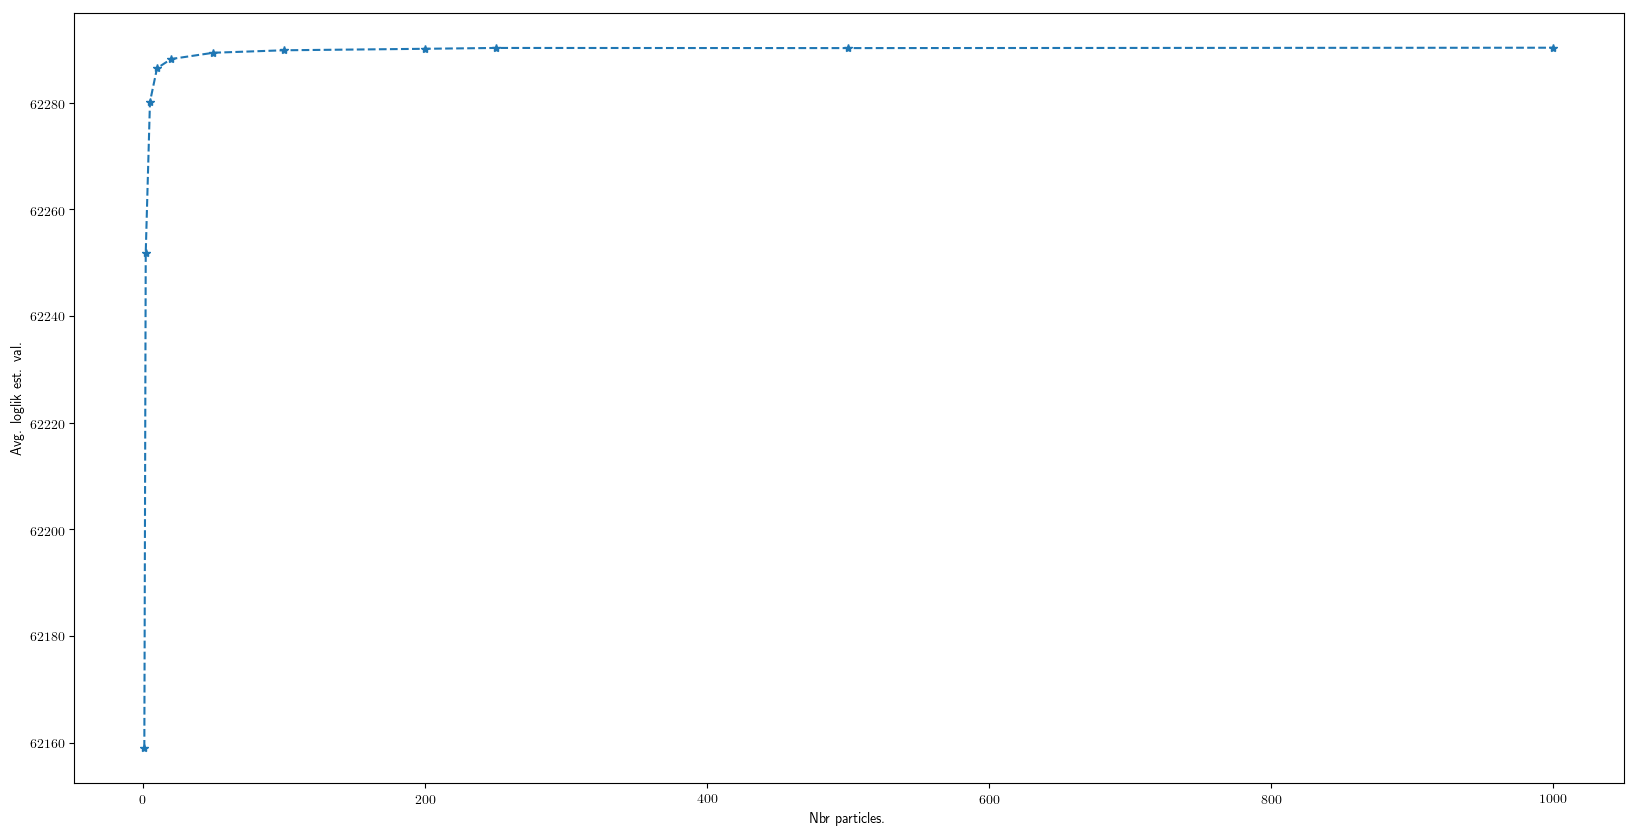

PyObject Text(24,0.5,'Avg. loglik est. val.')

In [49]:
PyPlot.figure(figsize=(20,10))
PyPlot.plot(nbr_particles_cpf, mean(pf_vals, dims = 1)[:], "--*")
PyPlot.xlabel("Nbr particles.")
PyPlot.ylabel("Avg. loglik est. val.")

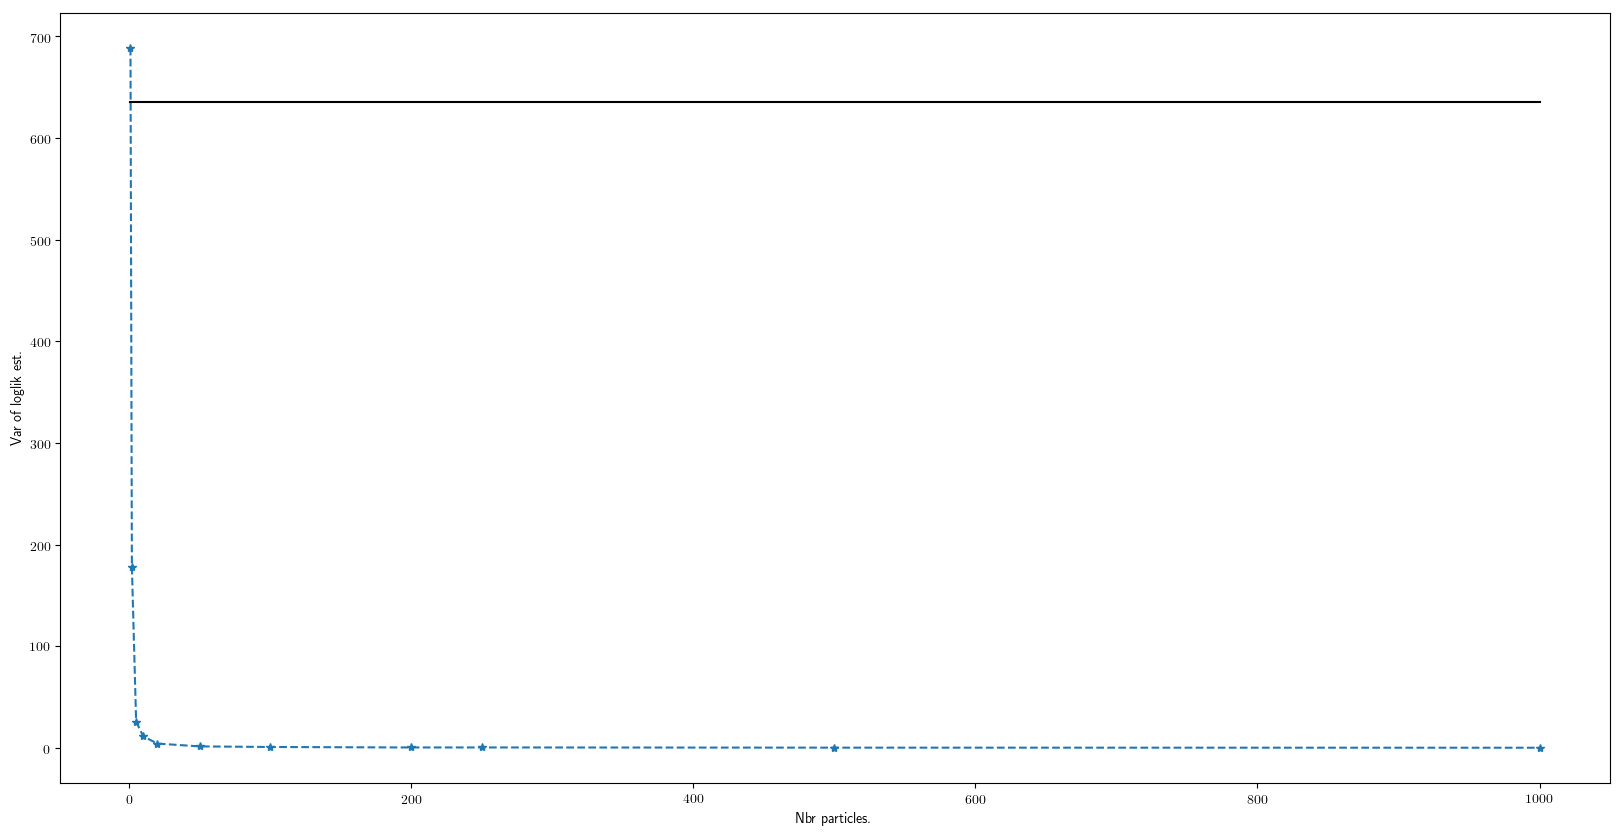

PyObject Text(24,0.5,'Var of loglik est.')

In [50]:
PyPlot.figure(figsize=(20,10))
PyPlot.plot(nbr_particles_cpf, var(pf_vals, dims = 1)[:], "--*")
PyPlot.plot(nbr_particles_cpf, data[2,1]*ones(length(nbr_particles_cpf),1), "k")

PyPlot.xlabel("Nbr particles.")
PyPlot.ylabel("Var of loglik est.")
#var_sort = var(pf_vals, dims = 1)[:]

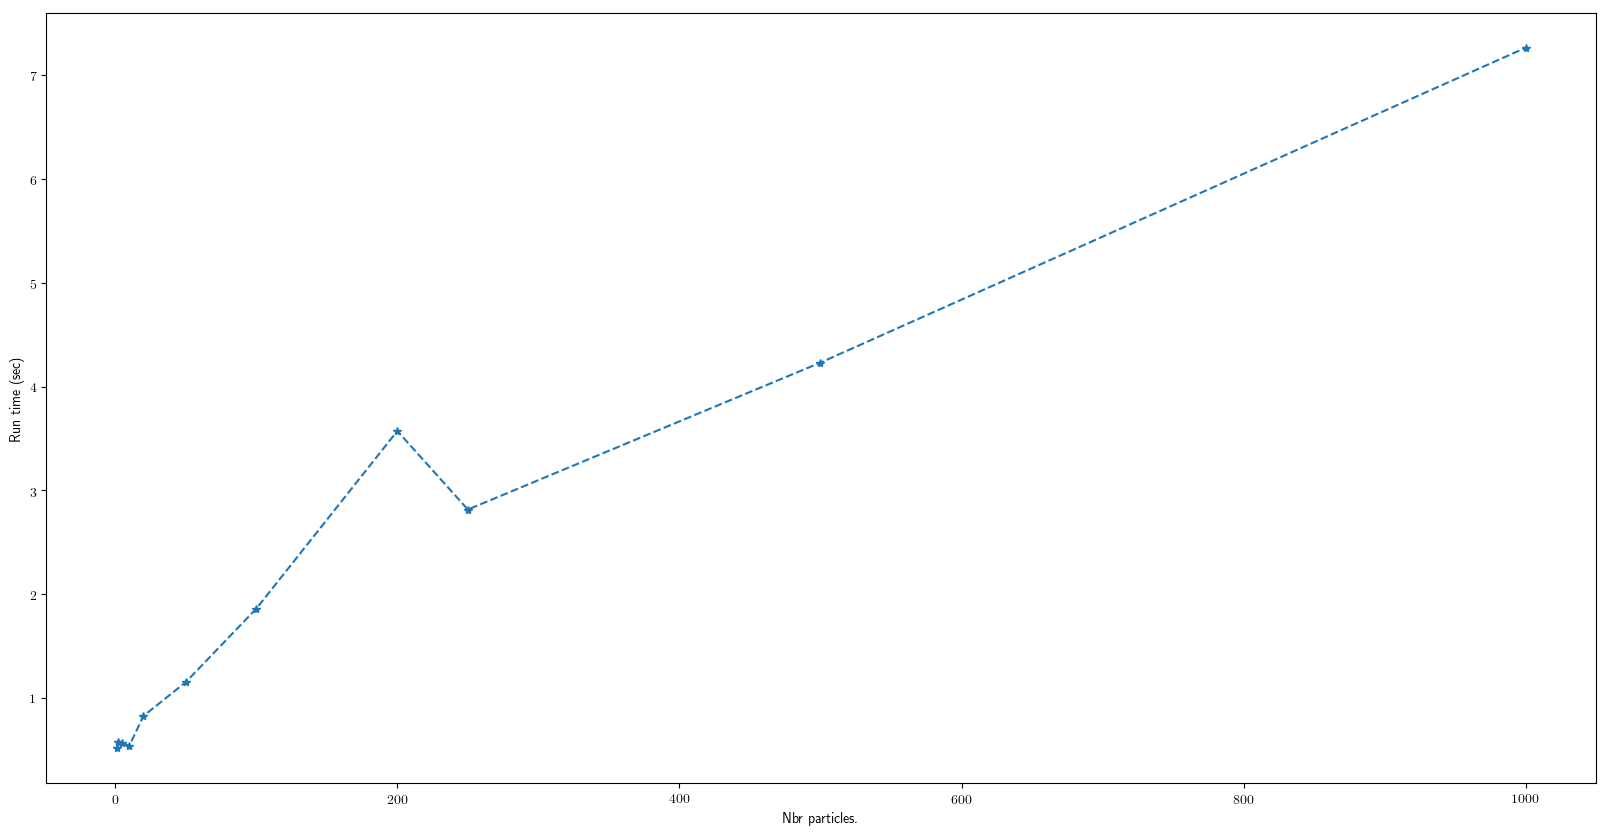

PyObject Text(24,0.5,'Run time (sec)')

In [51]:
PyPlot.figure(figsize=(20,10))
PyPlot.plot(nbr_particles_cpf, runtimes/size(data,1), "--*")
PyPlot.xlabel("Nbr particles.")
PyPlot.ylabel("Run time (sec)")

In [42]:
size(data,1)

50

# Compare var for sorting and no storting 

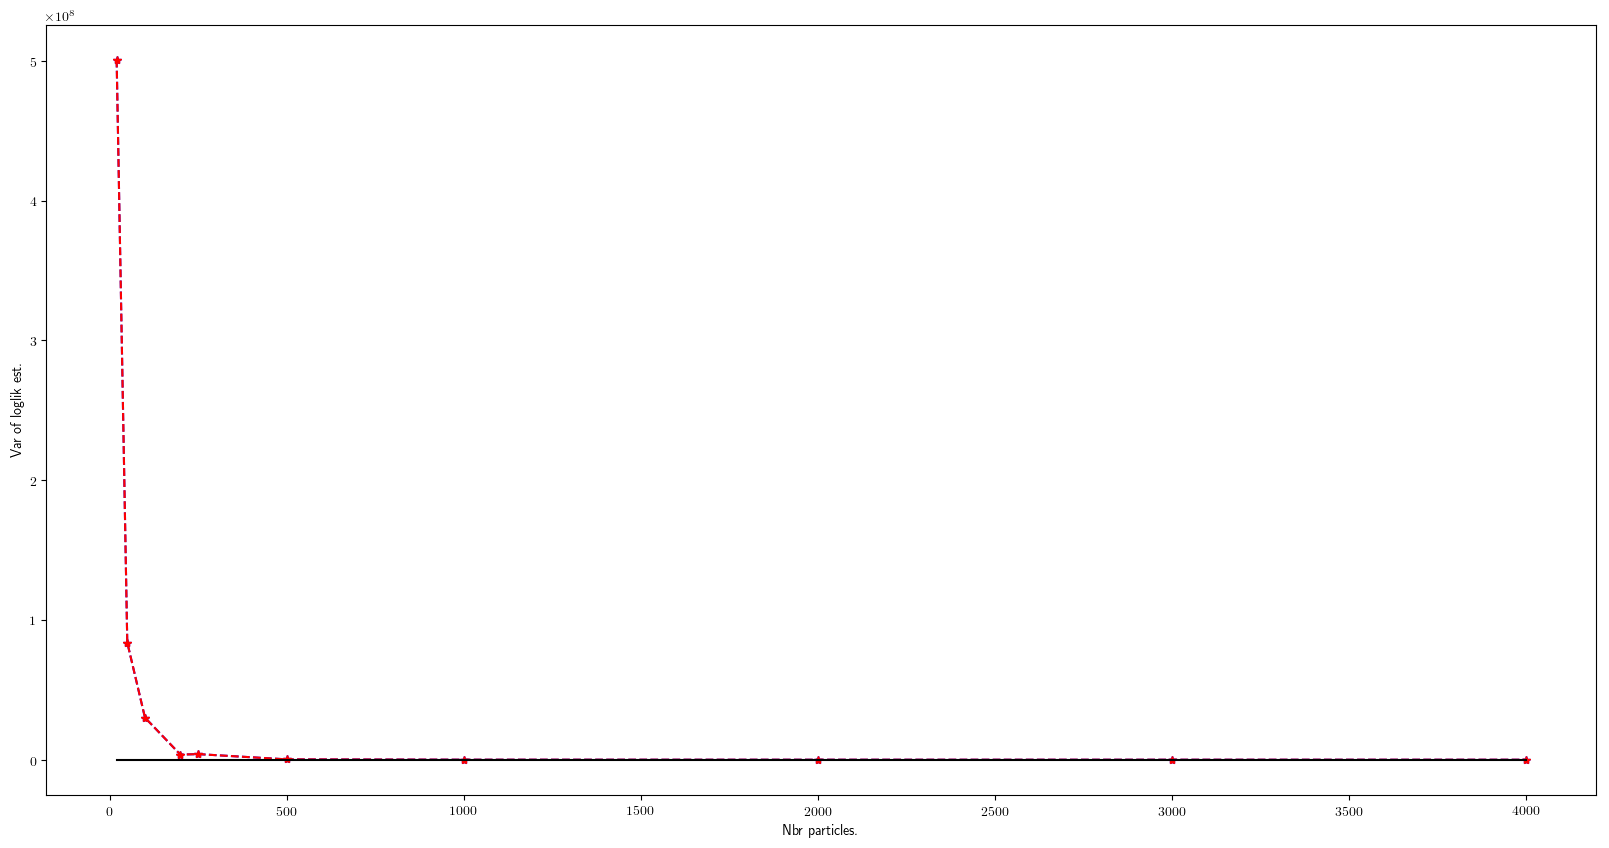

PyObject Text(24,0.5,'Var of loglik est.')

In [32]:
start_idx = 1

PyPlot.figure(figsize=(20,10))
PyPlot.plot(nbr_particles_pf[start_idx:end], var_sort[start_idx:end], "--*b")
PyPlot.plot(nbr_particles_pf[start_idx:end], var_no_sort[start_idx:end], "--*r")
PyPlot.plot(nbr_particles_pf[start_idx:end], 2*ones(length(nbr_particles_pf),1)[start_idx:end], "k")
PyPlot.xlabel("Nbr particles.")
PyPlot.ylabel("Var of loglik est.")

In [33]:
var_sort[6]

259820.9455435708

In [34]:
var_no_sort[6]

259821.39587058232

# Compare runtime for sort and no sorting 

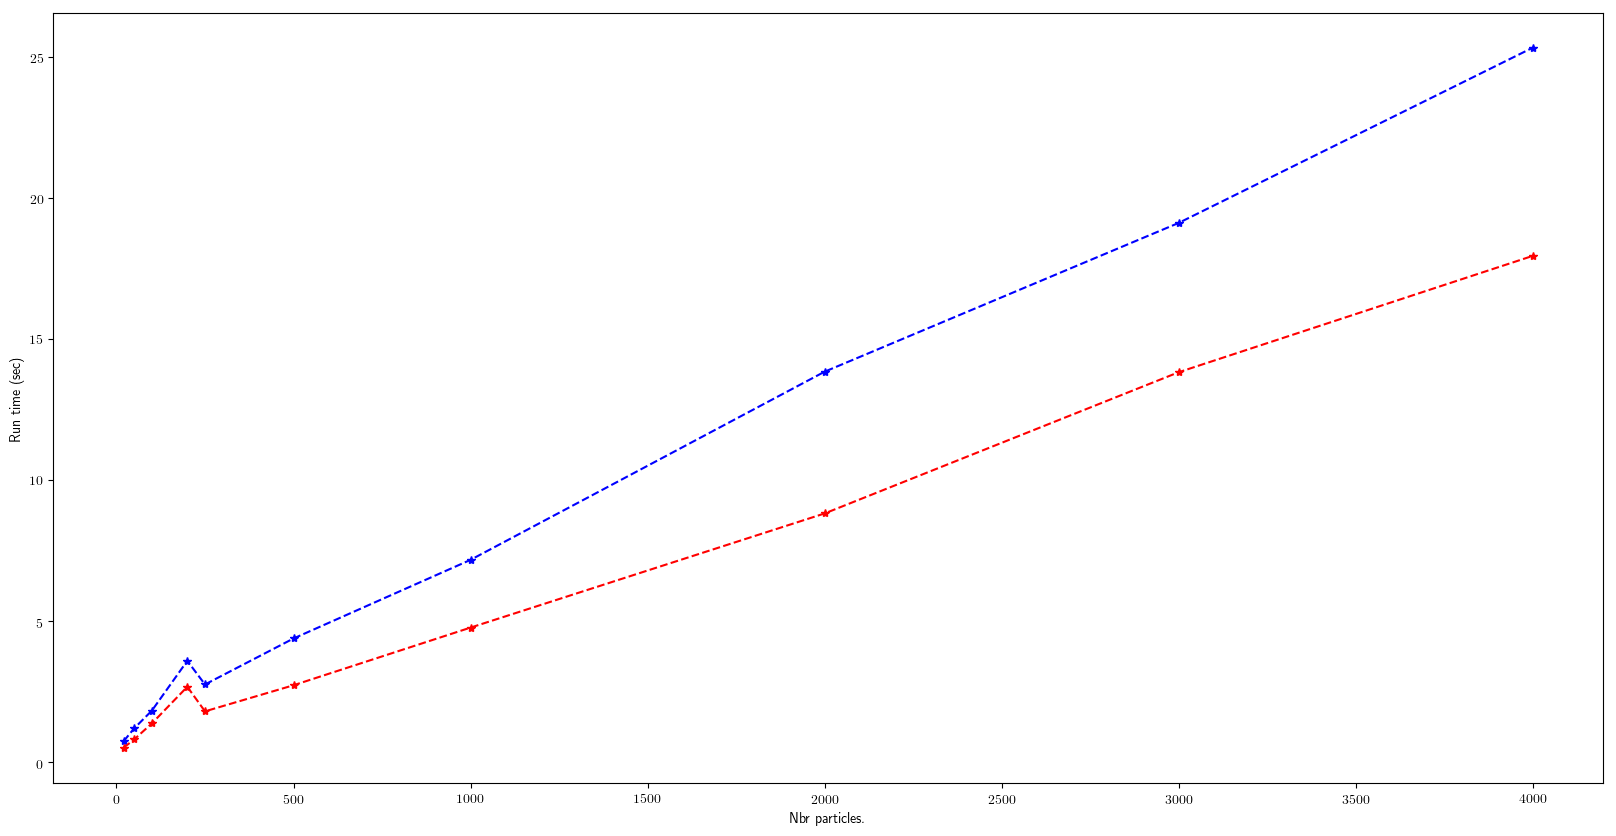

PyObject Text(24,0.5,'Run time (sec)')

In [35]:
PyPlot.figure(figsize=(20,10))
PyPlot.plot(nbr_particles_pf, runtimes_sort, "--*b")
PyPlot.plot(nbr_particles_pf, runtimes_no_sort, "--*r")
PyPlot.xlabel("Nbr particles.")
PyPlot.ylabel("Run time (sec)")